In [1]:
import networkx as nx
import matplotlib.pyplot as plt

### Barabasi-Albert (40 Nodes)

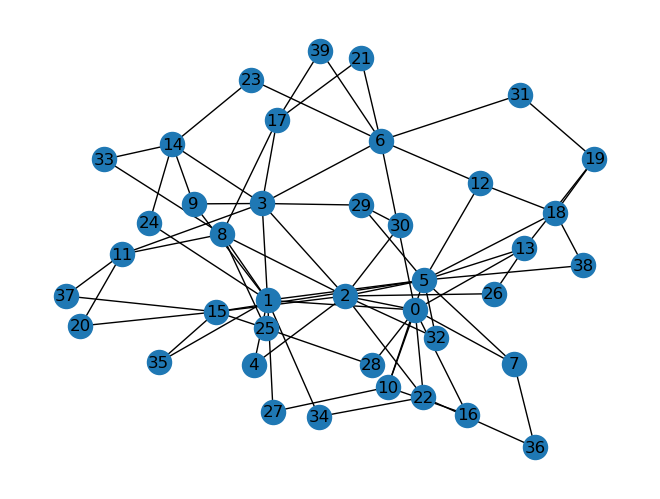

In [2]:
G = nx.barabasi_albert_graph(40, 2)
assert G.number_of_nodes() == 40
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

In [3]:
comp = nx.community.girvan_newman(G)
communities = tuple(sorted(c) for c in next(comp))

print('Communities:')

for community in communities:
    print(community)

Communities:
[0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 16, 20, 22, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37]
[6, 12, 17, 18, 19, 21, 23, 31, 38, 39]


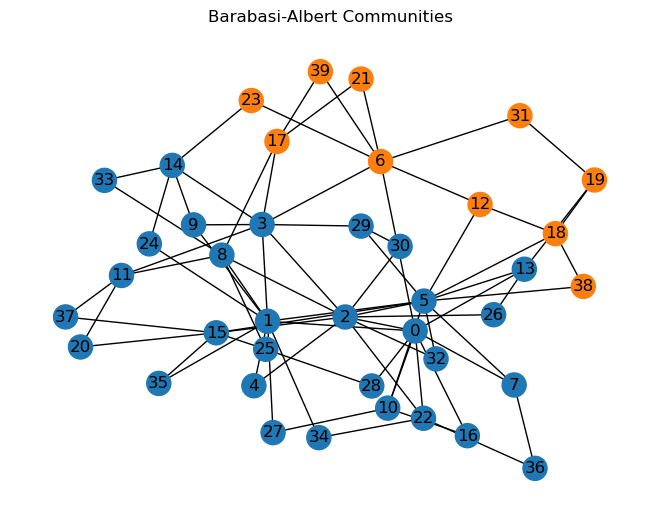

In [4]:
node_colors = {}

for i, community in enumerate(communities):
    for node in community:
        node_colors[node] = plt.cm.tab10(i)

nx.draw(G, pos, with_labels=True, node_color=[node_colors[node] for node in G.nodes()])
plt.title('Barabasi-Albert Communities')
plt.show()

It looks like most nodes are in the first community (blue), while there are a few "stragglers" in the second community (orange).  I would imagine this is because most nodes flock to the "richest" nodes in society (this is a scale-free graph), but, due to probability, a handful of nodes do not.

### Watts-Strogatz (40 Nodes)

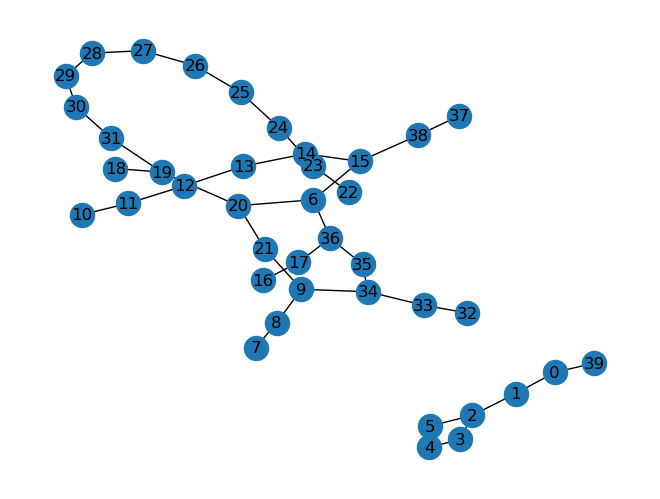

In [9]:
G = nx.watts_strogatz_graph(40, 3, 0.3)
assert G.number_of_nodes() == 40
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

In [10]:
comp = nx.community.girvan_newman(G)
communities = tuple(sorted(c) for c in next(comp))

print('Communities:')

for community in communities:
    print(community)

Communities:
[0, 1, 2, 3, 4, 5, 39]
[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 21, 32, 33, 34, 35, 36, 37, 38]
[18, 19, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


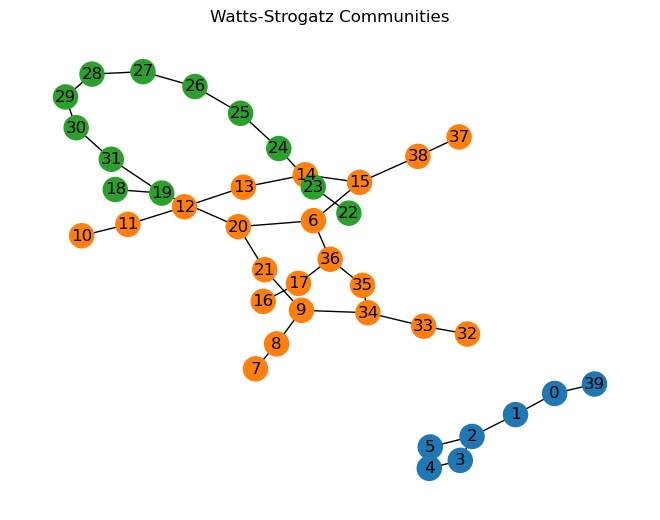

In [12]:
node_colors = {}

for i, community in enumerate(communities):
    for node in community:
        node_colors[node] = plt.cm.tab10(i)

nx.draw(G, pos, with_labels=True, node_color=[node_colors[node] for node in G.nodes()])
plt.title('Watts-Strogatz Communities')
plt.show()

For this network, we see that there are 3 communities.  This makes sense because there is a component separated from the majority of the network (the green nodes), and the larger/main component is not very dense, indicating that there are at least two separate communities.  Furthermore, since this is a small-world network, we know that clustering will be "not small" (so there will likely be distinct communities, as we can see).

### Erdos-Renyi (40 Nodes)

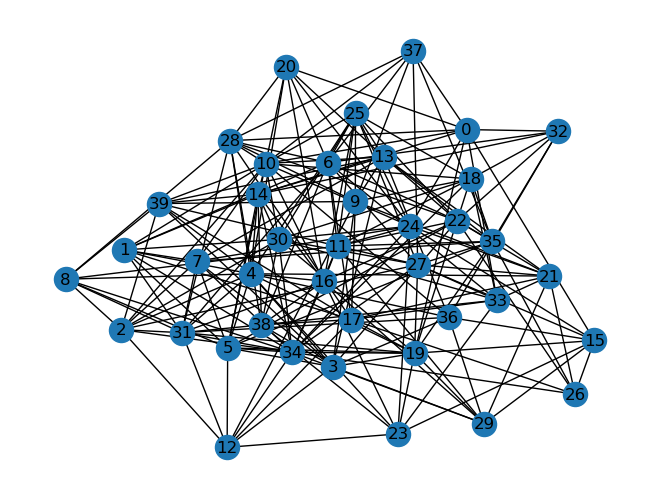

In [29]:
G = nx.erdos_renyi_graph(40, 0.3)
assert G.number_of_nodes() == 40
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

In [30]:
comp = nx.community.girvan_newman(G)
communities = tuple(sorted(c) for c in next(comp))

print('Communities:')

for community in communities:
    print(community)

Communities:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
[26]


In [32]:
degrees = dict(G.degree())
sorted_nodes = sorted(degrees, key=degrees.get, reverse=True)

for node in sorted_nodes:
    print(f'Node {node}: Degree {degrees[node]}')

Node 10: Degree 17
Node 34: Degree 17
Node 4: Degree 16
Node 19: Degree 14
Node 6: Degree 13
Node 31: Degree 13
Node 3: Degree 12
Node 5: Degree 12
Node 11: Degree 12
Node 13: Degree 12
Node 14: Degree 12
Node 16: Degree 12
Node 22: Degree 12
Node 25: Degree 12
Node 27: Degree 12
Node 28: Degree 12
Node 30: Degree 12
Node 17: Degree 11
Node 24: Degree 11
Node 35: Degree 11
Node 0: Degree 10
Node 1: Degree 10
Node 2: Degree 10
Node 7: Degree 10
Node 9: Degree 10
Node 18: Degree 10
Node 21: Degree 10
Node 38: Degree 10
Node 39: Degree 10
Node 33: Degree 9
Node 8: Degree 8
Node 12: Degree 8
Node 15: Degree 8
Node 20: Degree 8
Node 23: Degree 8
Node 29: Degree 8
Node 36: Degree 8
Node 32: Degree 7
Node 37: Degree 7
Node 26: Degree 6


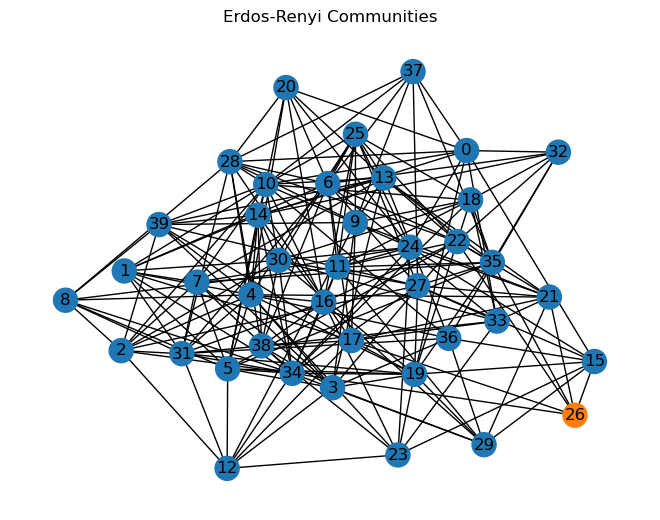

In [31]:
node_colors = {}

for i, community in enumerate(communities):
    for node in community:
        node_colors[node] = plt.cm.tab10(i)

nx.draw(G, pos, with_labels=True, node_color=[node_colors[node] for node in G.nodes()])
plt.title('Erdos-Renyi Communities')
plt.show()

It looks like there is one large community with a second community containing only a single node (node 26).  From my understanding of the Erdos-Renyi algorithm, edges are randomly placed between every pair of nodes with probability p (I used 0.3).  I printed out the node degrees in decreasing order, and it looks like node 26 has the smallest degree (likely just due to chance), which I imagine is why it was classified as its own community.

### Karate

34


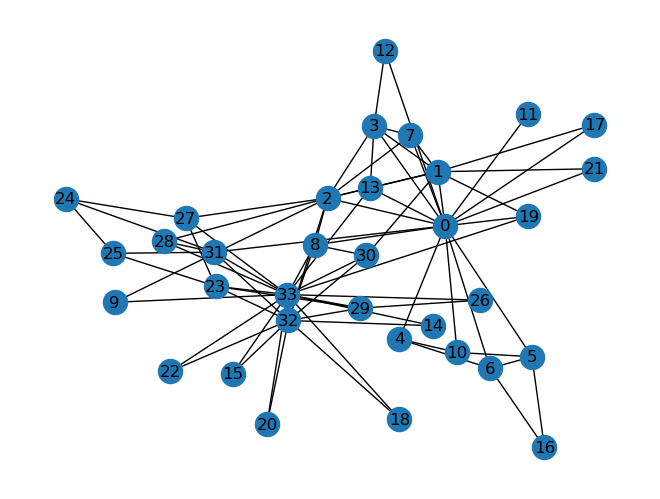

In [33]:
G = nx.karate_club_graph()
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

In [34]:
comp = nx.community.girvan_newman(G)
communities = tuple(sorted(c) for c in next(comp))

print('Communities:')

for community in communities:
    print(community)

Communities:
[0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21]
[2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


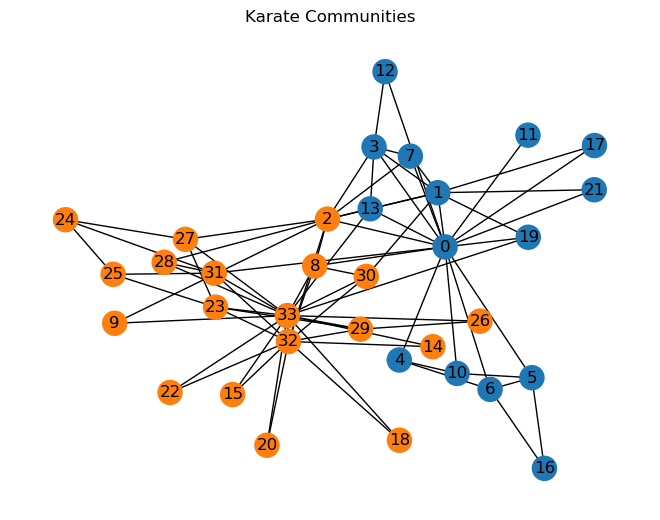

In [35]:
node_colors = {}

for i, community in enumerate(communities):
    for node in community:
        node_colors[node] = plt.cm.tab10(i)

nx.draw(G, pos, with_labels=True, node_color=[node_colors[node] for node in G.nodes()])
plt.title('Karate Communities')
plt.show()

We can see that there are two communities for this graph.  I think the results for this particular network are the most interpretable, because we know from our class discussion that this network represents two different karate clubs.  We also discussed the fact that nodes 0 and 33 represent the two club leaders, and we can see that they are in separate communities.

### My Own (Cycle, 40 Nodes)

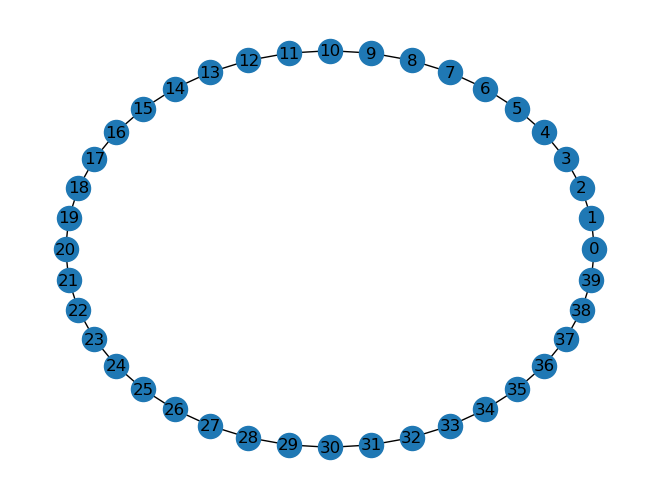

In [49]:
G = nx.cycle_graph(40)
assert G.number_of_nodes() == 40
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

In [50]:
comp = nx.community.girvan_newman(G)
communities = tuple(sorted(c) for c in next(comp))

print('Communities:')

for community in communities:
    print(community)

Communities:
[0, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


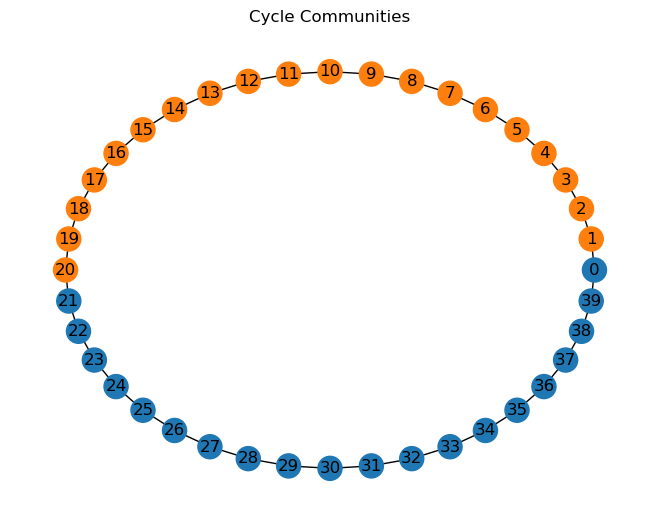

In [51]:
node_colors = {}

for i, community in enumerate(communities):
    for node in community:
        node_colors[node] = plt.cm.tab10(i)

nx.draw(G, pos, with_labels=True, node_color=[node_colors[node] for node in G.nodes()])
plt.title('Cycle Communities')
plt.show()

I used a cycle graph with 40 nodes (I used 40 nodes to be consistent with the majority of the previous graphs).  We can see that there are two distinct communities on each side of the circle/network.  This makes sense because nodes on one side of the circle are closer together than nodes on the other side.